### Importing packages & Dataset insight_002.xlsx

In [128]:
import csv
import numpy as np
import pandas as pd
import seaborn as sb
from scipy import stats
import matplotlib.pyplot as plt

In [86]:
insgt2=pd.read_excel('D:/MAC 4.2/insight_002.xlsx')

### Dropping unnecessary rows & columns

In [87]:
insgt2=insgt2.drop(0)

In [88]:
insgt2=insgt2[insgt2.columns.drop(list(insgt2.filter(regex='Paid')))]

In [89]:
columns=[]
for col in insgt2.columns:
    columns.append(col)
columns

['Post ID',
 'Post Message',
 'Type',
 'Countries',
 'Languages',
 'Posted',
 'Audience Targeting',
 'Lifetime Post Total Reach',
 'Lifetime Post organic reach',
 'Lifetime Post Total Impressions',
 'Lifetime Post Organic Impressions',
 'Lifetime Engaged Users',
 'Lifetime Matched Audience Targeting Consumers on Post',
 'Lifetime Matched Audience Targeting Consumptions on Post',
 'Lifetime Negative Feedback from Users',
 'Lifetime Negative Feedback',
 'Lifetime Post Impressions by people who have liked your Page',
 'Lifetime Post reach by people who like your Page',
 'Lifetime People who have liked your Page and engaged with your post',
 'Lifetime Organic views to 95%',
 'Lifetime Organic views to 95%.1',
 'Lifetime Organic Video Views',
 'Lifetime Organic Video Views.1',
 'Lifetime Average time video viewed',
 'Lifetime Video length']

In [90]:
types=[]
for r in list(insgt2.loc[:,'Type']):
    if r not in types:
        types.append(r)
types

['Photo', 'Video', 'Link', 'Status', 'SharedVideo', nan]

In [91]:
dropCol=['Post ID','Countries','Languages','Audience Targeting']


In [92]:
insgt2=insgt2.drop(dropCol,axis=1)
insgt2=insgt2.T.drop_duplicates().T

In [174]:
insgt2.tail(5)

,Post Message,Type,Posted,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Post Organic Impressions,Lifetime Engaged Users,Lifetime Matched Audience Targeting Consumers on Post,Lifetime Matched Audience Targeting Consumptions on Post,Lifetime Negative Feedback from Users,Lifetime Negative Feedback,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,Lifetime Organic views to 95%,Lifetime Organic views to 95%.1,Lifetime Organic Video Views,Lifetime Organic Video Views.1,Lifetime Average time video viewed,Lifetime Video length
287,Hear about the prestigious global finale and t...,Status,2020-10-16 02:05:24,634,726,726,4,3,3,0,0,539,456,4,0,0,0,0,0,0
288,To know more about RB Global Challenge and How...,SharedVideo,2020-10-09 02:25:41,654,758,758,10,7,8,0,0,590,492,10,0,0,53,54,0,15145
289,Registration window of RB Global Challenge is ...,SharedVideo,2020-10-02 07:00:42,488,563,563,8,5,6,0,0,400,340,8,0,0,16,16,0,115008
290,"The Result: Nin presents ""Spill the Ink""!! --...",Photo,2020-09-30 08:30:47,969,1148,1148,26,13,17,0,0,888,719,24,0,0,0,0,0,0
291,"The Result: Nin presents ""Spill the Ink""!! --...",Photo,2020-09-30 06:57:22,2149,2611,2611,316,194,304,0,0,1047,846,56,0,0,0,0,0,0


In [116]:
a,b=insgt2.shape
insgt2.shape

(291, 20)

In [136]:
columns=[]
for col in insgt2.columns:
    columns.append(col.replace('Lifetime ',''))
columns[3:]

['Post Total Reach',
 'Post Total Impressions',
 'Post Organic Impressions',
 'Engaged Users',
 'Matched Audience Targeting Consumers on Post',
 'Matched Audience Targeting Consumptions on Post',
 'Negative Feedback from Users',
 'Negative Feedback',
 'Post Impressions by people who have liked your Page',
 'Post reach by people who like your Page',
 'People who have liked your Page and engaged with your post',
 'Organic views to 95%',
 'Organic views to 95%.1',
 'Organic Video Views',
 'Organic Video Views.1',
 'Average time video viewed',
 'Video length']

### The clean, modified dataset is being saved & correlation analysis is being done over it.

In [137]:
with open('insgt2CorrData.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(columns[3:])
    for i in range(0,a-1):
        writer.writerow(list(insgt2.iloc[i,3:]))

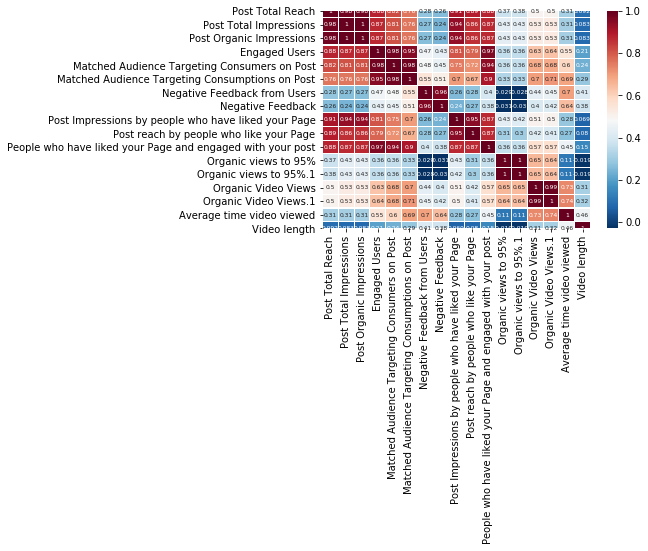

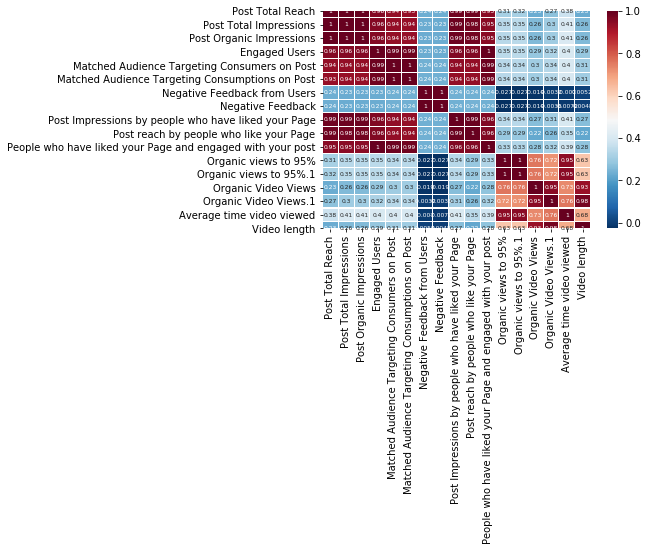

In [149]:
corrSet=pd.read_csv('insgt2CorrData.csv')
cT=['pearson','spearman']
for i in cT:
    corrStat = corrSet.corr(method=i)
    corrStat.to_csv('insight2_'+i+'_corr.csv')
    plot = plt. figure(i)
    sb.heatmap(corrStat, 
               xticklabels=corrStat.columns,
               yticklabels=corrStat.columns,
               cmap='RdBu_r',
               annot=True,
               annot_kws={"size":6},
               linewidth=0.1)
    plt.savefig('insight2_'+i+'_corr.jpg',dpi=200,bbox_inches='tight')

In [168]:
f=open('insight2_pearson_corr.csv')
prin2=list(csv.reader(f,delimiter=','))
f=open('insight2_spearman_corr.csv')
spin2=list(csv.reader(f,delimiter=','))
count=0
denom=0
for i in range(1,len(prin2)):
    for j in range(1,len(prin2)):
        denom=denom+1
        if prin2[i][j]!='':
            if abs(float(spin2[i][j])-float(prin2[i][j]))>0.2:
                prin2[i][j]=''
                count=count+1
            
print(' ',count,'cells from Spearman Correlation dataset are discarded which is ',(count*100)/denom,'% of total data\n')
print(' The discarded data of Spearman have higher difference than those of Pearson, \n so we cannot  confidently say that\n the relationship between two factors is linear or monotonic')

  80 cells from Spearman Correlation dataset are discarded which is  27.68166089965398 % of total data

 The discarded data of Spearman have higher difference than those of Pearson, 
 so we cannot  confidently say that
 the relationship between two factors is linear or monotonic


### Here we can see that, sensitivity set at 0.2 resulted in deletion of 27.68% data.
### It means that- almost one-third time we are not sure whether the relation is linear or monotonic.
### So, we have discarded those coefficients before final discussion.

### We have taken Pearson's Coeffiecients as it deals with raw data whereas Spearman deals with the ranked ones.

In [172]:
strngPos=[]
file1=open('insight2DataPosCor.txt', 'w', newline='')
file1.write('Strong Positive Correlation Between\n')
count=0
for r in range(1,len(prin2)):
    for c in range(r+1,len(prin2)):
        try:
            if float(prin2[r][c])>0.8:
                count=count+1
                strngPos.append(prin2[0][r]+' & '+prin2[0][c]+' :  '+prin2[r][c])
                file1.write(str('-'+prin2[0][r]+' & '+prin2[0][c]+' :  '+prin2[r][c]+'\n'))
        except: pass
file1.close()

In [173]:
print('Strong Positive Correlation Between\n')
for i in strngPos:
    print(i)

Strong Positive Correlation Between

Post Total Reach & Post Total Impressions :  0.9816217200275982
Post Total Reach & Post Organic Impressions :  0.981621720490592
Post Total Reach & Engaged Users :  0.8828793558233597
Post Total Reach & Matched Audience Targeting Consumers on Post :  0.821405927448773
Post Total Reach & Post Impressions by people who have liked your Page :  0.9100634163398652
Post Total Reach & Post reach by people who like your Page :  0.8889392141639457
Post Total Reach & People who have liked your Page and engaged with your post :  0.8828350606460359
Post Total Impressions & Post Organic Impressions :  0.9999999979980205
Post Total Impressions & Engaged Users :  0.8725403240665159
Post Total Impressions & Matched Audience Targeting Consumers on Post :  0.8138505613690098
Post Total Impressions & Post Impressions by people who have liked your Page :  0.9376929476028965
Post Total Impressions & Post reach by people who like your Page :  0.8626862682814148
Post Tota

### Here, some pairs have 0.99 because they are actually same data but recorded for unique user & total view